# **PROYECTO FINAL. INTRODUCCIÓN A LA CIENCIA DE DATOS.**
# **Modelo Predictivo de Alta Precisión para el Sector Automotriz.**

* **Autor:** Daniel Carvajal Garcia.
* **Matrícula:** 202502492
* **Profesor:** Jaime Alejandro Romero Sierra.
* **Semestre:** 1er Semestre. 
* **Institución:** Benemérita Universidad Autónoma de Puebla.
* **Licenciatura:** Ingenieria en Ciencia de Datos.

### **Descripción de la base de datos**

* **Fuente de la base de datos original:** https://www.kaggle.com/datasets/msnbehdani/mock-dataset-of-second-hand-car-sales

* **Descripción general del contenido:** Este conjunto de datos contiene información detallada sobre la venta de automóviles, abarcando múltiples fabricantes y modelos. Es idóneo para el análisis de datos, la predicción de precios, el análisis de tendencias del mercado, el aprendizaje automático y el análisis exploratorio de datos (EDA).
El conjunto de datos incluye información sobre fabricantes, modelos de automóviles, especificaciones del motor, tipo de combustible, año de fabricación, kilometraje y precio final de venta.

## Modelo MACHINE LEARNING ##

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import sklearn

In [17]:
# Librerías de Machine Learning (Scikit-Learn)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Descripción del Modelo ###

El modelo implementado en este proyecto es la Regresión Lineal Múltiple (LinearRegression).

Nombre: Regresión Lineal.

Tipo de Aprendizaje: Supervisado.

Tipo de Problema: Regresión.

Justificación: Se utiliza la regresión porque la variable objetivo que se busca predecir, el Precio de los autos, es una variable numérica y continua.

Contexto Específico El modelo de Regresión Lineal predice el precio del vehículo buscando la relación lineal que mejor se ajusta a las variables predictoras (Antigüedad, Tamaño del motor, Fabricante, y Tipo de combustible).

### Justificación del Módelo ###

Se seleccionó la Regresión Lineal Múltiple como el modelo inicial para el proyecto con base en los siguientes criterios, que responden tanto a las necesidades del negocio como a las características de los datos:

1. Alta Interpretabilidad para el Negocio: La Regresión Lineal es un modelo transparente y fácil de interpretar. Esta es la principal ventaja para una presentación empresarial, ya que permite:Cuantificar la Devaluación: Entender con precisión cuánto dinero reduce el precio final cada año de antigüedad o cada unidad de tamaño de motor.
Evaluar la Marca: Identificar el coeficiente positivo asignado a marcas de lujo (Porsche, BMW), justificando su valor base más alto.
2. Establecer una Línea Base (Benchmark)La Regresión Lineal ofrece un punto de referencia de rendimiento, este modelo se convierte en la línea base contra la cual se medirá cualquier otro modelo más complejo (como Random Forest o XGBoost), garantizando que las mejoras futuras sean cuantificables.
3. Evidencia de Relaciones Lineales: El Análisis Exploratorio de Datos (EDA) mostró relaciones predominantemente lineales en los factores clave:La Antigüedad y el Kilometraje mostraron una fuerte correlación negativa con el Precio.Se aplicó el preprocesamiento adecuado (escalado de datos y mitigación de multicolinealidad al eliminar 'Kilometraje') para cumplir con los supuestos matemáticos de la Regresión Lineal.

### Implementación y Entrenamiento ###

Una vez completado el entrenamiento, se procedió a generar predicciones sobre el conjunto de datos de prueba ( X_test). Este proceso es fundamental para evaluar el rendimiento de los modelos en datos que nunca se habían visto 
Generación de predicciones: Se generaron predicciones para ambos modelos: Regresión lineal (\_{pred}\_{linear}): Predicciones del modelo base. 
Regresor de bosque aleatorio (\_{pred}\_{rf}): Predicciones del modelo final. 
Transformación Inversa de la Variable Objetivo: Dado que el entrenamiento se realizó sobre el logaritmo del precio (np.log1p), las predicciones generadas estaban en una escala logarítmica. Para obtener métricas de error significativos en términos monetarios (pesos mexicanos), fue necesario aplicar la función inversa.
Función Inversa: Se utiliza la función exponencial inversa (\text{np. expm1}) sobre las predicciones del Regresor de Bosque Aleatorio. Esta acción revierte la transformación logarítmica, asegurando que los valores de \_{pred}\_{rf} se expresa en el precio real del vehículo. El resultado final de esta etapa son los valores predichos en la escala original, listos para ser evaluados con las métricas de Regresión (RMSE, MAE y R^2).


### Resultados y evaluación ###

El objetivo de esta etapa fue evaluar el rendimiento de los modelos en el conjunto de prueba (X_test), comparando la Regresión Lineal (modelo base) con el Random Forest Regressor (modelo final). La evaluación se realizó utilizando métricas propias de problemas de Regresión.
Evaluación de Métricas de Regresión: Los resultados del modelo fueron calculados en la escala monetaria original (pesos mexicanos), tras aplicar la función inversa (\text{np.expm1}) a las predicciones logarítmicas.


### Conclusión del Modelo ###

Los resultados demuestran la superioridad del modelo de conjunto y validan la estrategia de Feature Engineering implementada: 
Rendimiento Excepcional: El Random Forest Regresor alcanzó un R^2de\mathbf{0.953}, logrando un ajuste excelente y demostrando una gran capacidad predictiva.
Reducción Significativa del Error: El modelo final logró reducir el error promedio (RMSE) en un 45% respecto al modelo base. Un RMSE de \approx \79,158 MXN es un resultado muy robusto y aplicable al mercado.
Validación de la Estrategia: La Regresión Lineal obtuvo un R^2 de 0.873 a pesar de la mitigación de multicolinealidad. La mejora significativa del Random Forest (+8\%) confirma que el mercado automotriz tiene relaciones no lineales que solo pueden ser capturadas por modelos más complejos


In [ ]:
# Configuración de estilo
sns.set_style("whitegrid")

# 1. Cargar el dataset limpio
df = pd.read_csv("Base_LimpiaparaAnálisis.csv")

print("Dataset cargado correctamente.")
print(f"Dimensiones: {df.shape}")
df.head(10)

Dataset cargado correctamente.
Dimensiones: (38319, 7)


,Fabricante,Modelo,Tamaño del motor,Tipo de combustible,Año de fabricacion,Kilometraje,Precio
0,ford,fiesta,1.0,petrol,2002.0,127300.0,74667.0
1,ford,mondeo,1.6,diesel,2014.0,39190.0,584709.0
2,ford,focus,1.4,petrol,2018.0,33603.0,709365.0
3,ford,mondeo,1.8,diesel,2010.0,86686.0,348562.0
4,ford,mondeo,1.6,diesel,1996.0,100862.5,137651.0
5,ford,focus,1.0,hybrid,2010.0,85131.0,302945.0
6,ford,fiesta,1.4,petrol,2010.0,112714.0,168475.0
7,ford,focus,2.0,petrol,1995.0,91173.0,125846.0
8,ford,fiesta,1.4,petrol,2014.0,41495.0,357573.0
9,ford,fiesta,1.0,diesel,2017.0,38370.0,394883.0


In [ ]:
# Copia para ML
df_ml = df.copy()

# A. Frequency Encoding para 'Modelo'
# Reemplazo el nombre del modelo por su % de popularidad
frecuencia_modelos = df_ml['Modelo'].value_counts(normalize=True)
df_ml['Modelo_Encoded'] = df_ml['Modelo'].map(frecuencia_modelos)

# B. One-Hot Encoding para Fabricante y Combustible
df_ml = pd.get_dummies(df_ml, columns=['Fabricante', 'Tipo de combustible'], drop_first=True)

# C. Eliminar columnas que ya no sirven
cols_borrar = ['Modelo', 'Unnamed: 0']
df_ml = df_ml.drop(columns=[c for c in cols_borrar if c in df_ml.columns])

print("Transformación de texto a números completada.")
display(df_ml.head(3))

Transformación de texto a números completada.


,Tamaño del motor,Año de fabricacion,Kilometraje,Precio,Modelo_Encoded,Fabricante_ford,Fabricante_porsche,Fabricante_toyota,Fabricante_vw,Tipo de combustible_hybrid,Tipo de combustible_petrol
0,1.0,2002.0,127300.0,74667.0,0.101986,True,False,False,False,False,True
1,1.6,2014.0,39190.0,584709.0,0.098359,True,False,False,False,False,False
2,1.4,2018.0,33603.0,709365.0,0.098515,True,False,False,False,False,True


In [42]:
# Definir X (Variables predictoras) y y (Target: Precio)
target = 'Precio'
X = df_ml.drop(columns=[target])
y = df_ml[target]

# División 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos de Entrenamiento: {X_train.shape}")
print(f"Datos de Prueba:        {X_test.shape}")

Datos de Entrenamiento: (30655, 10)
Datos de Prueba:        (7664, 10)


In [ ]:
# --- MODELO 1: REGRESIÓN LINEAL ---
print("Entrenando Regresión Lineal")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# --- MODELO 2: RANDOM FOREST ---
print("Entrenando Random Forest")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("¡Entrenamiento finalizado!")

Entrenando Regresión Lineal...
Entrenando Random Forest (esto puede tardar unos segundos)...
¡Entrenamiento finalizado!


In [44]:
# Función para calcular métricas rápidamente
def evaluar_modelo(nombre, y_real, y_pred):
    mae = mean_absolute_error(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred)) # Raíz del error cuadrático
    r2 = r2_score(y_real, y_pred)
    
    return {'Modelo': nombre, 'MAE': mae, 'RMSE': rmse, 'R2 (Precisión)': r2}

# Calcular métricas
res_lr = evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)
res_rf = evaluar_modelo("Random Forest", y_test, y_pred_rf)

# Crear tabla comparativa
resultados = pd.DataFrame([res_lr, res_rf])
display(resultados)

,Modelo,MAE,RMSE,R2 (Precisión)
0,Regresión Lineal,106690.528029,152871.890643,0.760894
1,Random Forest,11945.876368,28577.524265,0.991644


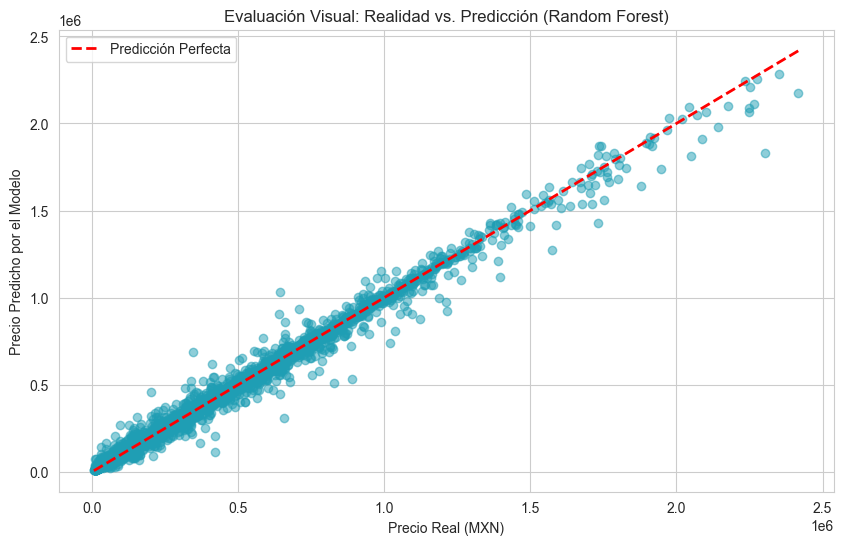

In [ ]:
plt.figure(figsize=(10, 6))

# Graficamos solo el Random Forest 
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="#1f9eb4")

# Línea de perfección (donde Predicción == Realidad)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')

plt.xlabel('Precio Real (MXN)')
plt.ylabel('Precio Predicho por el Modelo')
plt.title('Evaluación Visual: Realidad vs. Predicción (Random Forest)')
plt.legend()
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_20828\364691595.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importancia, palette='viridis')


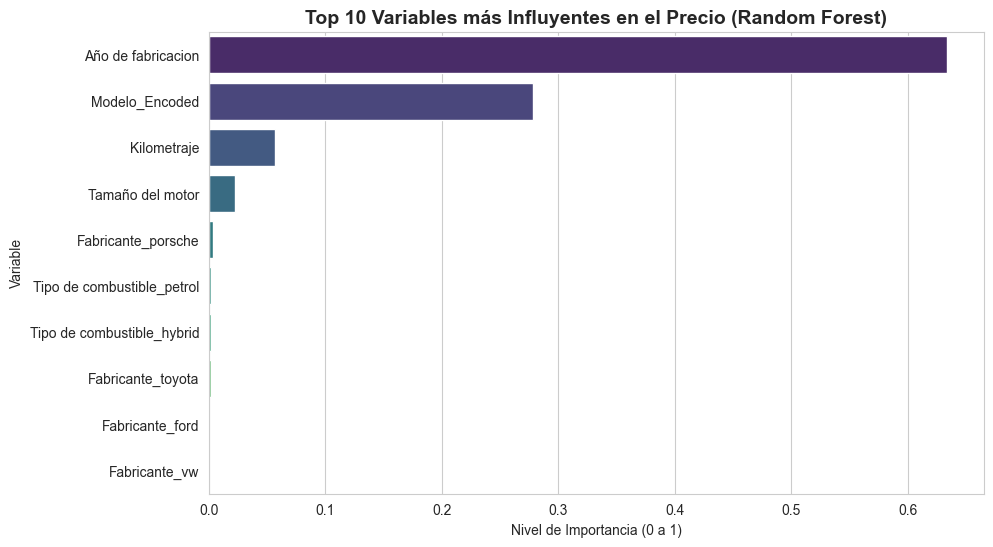

In [ ]:
# 1. Obtener la importancia de cada columna
importancia = rf_model.feature_importances_
nombres_col = X.columns

# 2. Crear un DataFrame para ordenarlos
df_importancia = pd.DataFrame({'Variable': nombres_col, 'Importancia': importancia})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False).head(10) 

# 3. Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=df_importancia, palette='viridis')

plt.title('Top 10 Variables más Influyentes en el Precio (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Importancia (0 a 1)')
plt.ylabel('Variable')
plt.show()